# ¡Hola Bienvenindo al annálisis estadístico desarrollado por Natalia! <a class="tocSkip"></a>

Análisis estadístico y comportamiento de consumo para Megaline. 
Limpieza de datos (ETL), cálculo de ingresos y pruebas de hipótesis (t-test) en Python para optimizar la rentabilidad de planes tarifarios.


## Importación de librerías

In [ ]:
# Cargar todas las librerías

import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
import math

## Cargar datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames

df_users = pd.read_csv('/datasets/megaline_users.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')


## Preparar los datos

## Tarifas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print(df_plans.head(5))
df_plans.info()

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   pla

In [ ]:
# Imprime una muestra de los datos para las tarifas

print(df_plans.sample(2))
print(df_plans.iloc[0:2]) 


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Corregir datos

In [ ]:
print(df_plans.columns)
print()

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')



## Enriquecer los datos

In [ ]:
print(df_plans['plan_name'].unique())
df_plans = df_plans.rename(columns={'plan_name': 'plan'})
#Creamos una columna con GB
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024

print(df_plans)


print(df_plans.dtypes)
print(df_plans.info())



['surf' 'ultimate']
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute      plan  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  
messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan                      object
gb_per_month_included    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ---

## Usuarios

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

df_users.info()
print(df_users.head(10))
print(df_users.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40   

In [ ]:
# Imprime una muestra de datos para usuarios

print(df_users.sample(5))
print(df_users.iloc[10:15]) 

     user_id first_name  last_name  age  \
477     1477     Magaly      Rivas   52   
373     1373    Lindsey  Dickerson   21   
99      1099     Shavon      Banks   48   
314     1314      Brice     Morgan   35   
328     1328    Tamesha      Huber   20   

                                            city    reg_date      plan  \
477     Riverside-San Bernardino-Ontario, CA MSA  2018-08-24  ultimate   
373  Minneapolis-St. Paul-Bloomington, MN-WI MSA  2018-08-30  ultimate   
99     New York-Newark-Jersey City, NY-NJ-PA MSA  2018-02-26      surf   
314       Los Angeles-Long Beach-Anaheim, CA MSA  2018-03-06  ultimate   
328  Minneapolis-St. Paul-Bloomington, MN-WI MSA  2018-02-10      surf   

    churn_date  
477        NaN  
373        NaN  
99         NaN  
314        NaN  
328        NaN  
    user_id first_name last_name  age  \
10     1010     Wilber     Blair   52   
11     1011     Halina     Henry   73   
12     1012    Jonelle   Mcbride   59   
13     1013    Nicolas    Snid

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

R./ La tabla de usuarios muestra información descriptiva sobre los planes, las ciudades y esta información general de los usuarios.
Algo que vamos a arreglar es los valores nulos, duplicados y formatos de fechas.
Adicional vamos a añadir unas columnas para poder tener claro algunos análisis como las fechas y algunas operaciones aritméticas con las mismas

### Corrección de los datos


In [ ]:

#Convertimos al formato datetime64 de pandas para poder hacer operaciones con las fechas
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
print()
print(df_users.dtypes)
print()
#Revisar si hay duplicados
print("¿Hay duplicados completos?", df_users.duplicated().any())
print("Número de duplicados completos:", df_users.duplicated().sum())
print()
#Verificar si tenemos algun valor nulo
print("Valores nulos por columna:")
print(df_users.isnull().sum())
print()
print("Planes únicos: \n", df_users['plan'].unique())
print("Conteo por plan: ", df_users['plan'].value_counts())
print()
#Verificar columna edad hasta donde llegan los rangos para conocer a nuestros usuarios
print("Estadísticas de edad:")
print(df_users['age'].describe())
print("Edades mínima y máxima:", df_users['age'].min(), df_users['age'].max())
print()
#Verificar fechas de registro desde cuando hasta cuando las tenemos
print("Rango de fechas de registro:")
print("Desde:", df_users['reg_date'].min())
print("Hasta:", df_users['reg_date'].max())
print()
# Verificar si hay problemas en los nombres de ciudades
print("Ciudades únicas:", df_users['city'].nunique())
print("Muestra de ciudades:", df_users['city'].unique()[:10])



user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object

¿Hay duplicados completos? False
Número de duplicados completos: 0

Valores nulos por columna:
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Planes únicos: 
 ['ultimate' 'surf']
Conteo por plan:  surf        339
ultimate    161
Name: plan, dtype: int64

Estadísticas de edad:
count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64
Edades mínima y máxima: 18 75

Rango de fechas de registro:
Desde: 2018-01-01 00:00:00
Hasta: 2018-12-31 00:00:00

Ciudades únicas: 73
Muestra de ciudades: ['Atlanta-Sandy Spring

### Enriquecer los datos

In [ ]:
# Categorizar edades en grupos
df_users['age_group'] = pd.cut(df_users['age'], 
                               bins=[0, 25, 35, 50, 65, 100], 
                               labels=['18-25', '26-35', '36-50', '51-65', '65+'])


print()
# Extraer región geográfica de la ciudad
df_users['state'] = df_users['city'].str.extract(r', ([A-Z]{2})')
print()
# Mes y trimestre de registro

df_users['reg_month'] = df_users['reg_date'].dt.month
df_users['reg_quarter'] = df_users['reg_date'].dt.quarter

print()

#Crear una columna de los días activos restando la fecha de registro menosel ultimo dia Días desde el registro hasta fin de año
df_users['days_active'] = (pd.to_datetime('2018-12-31') - df_users['reg_date']).dt.days

# Indicador de churn (abandono)
df_users['churned'] = df_users['churn_date'].notna()

# Tiempo de vida del cliente (para los que abandonaron)
df_users['customer_lifetime_days'] = (df_users['churn_date'] - df_users['reg_date']).dt.days

print(df_users.sample(15))




     user_id first_name   last_name  age  \
47      1047        Yuk      French   22   
66      1066      Ariel       Woods   61   
412     1412     Cortez       Reese   61   
20      1020      Rutha        Bell   56   
80      1080       Neal       Mcgee   45   
466     1466   Alphonse      Harmon   56   
92      1092      Taren  Strickland   26   
333     1333       Macy       David   57   
163     1163      Lanie  Washington   27   
411     1411        Man     Fleming   64   
292     1292     Cassey      French   42   
0       1000   Anamaria       Bauer   45   
14      1014    Edmundo       Simon   61   
220     1220       Jack      Strong   26   
450     1450      Errol     Marquez   67   

                                          city   reg_date      plan  \
47        Indianapolis-Carmel-Anderson, IN MSA 2018-06-16  ultimate   
66          Boston-Cambridge-Newton, MA-NH MSA 2018-03-08      surf   
412            Detroit-Warren-Dearborn, MI MSA 2018-04-08  ultimate   
20      

## Llamadas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

df_calls.info()
print(df_calls.head(10))
print(df_calls.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
5  1000_388     1000  2018-12-31      2.20
6  1000_510     1000  2018-12-27      5.75
7  1000_521     1000  2018-12-28     14.18
8  1000_530     1000  2018-12-28      5.77
9  1000_544     1000  2018-12-26      4.40
              id  user_id   call_date  duration
137730  1499_199     1499  2018-11-21      8.72
137731  1499_

In [ ]:
# Imprime una muestra de datos para las llamadas

print(df_calls.sample(5))
print(df_calls.iloc[10:15]) 


              id  user_id   call_date  duration
4466    1018_528     1018  2018-11-03      9.04
37486   1141_500     1141  2018-10-16      0.00
64761    1236_21     1236  2018-10-01     18.07
106249  1374_345     1374  2018-10-10     10.55
25247   1097_350     1097  2018-11-14      0.00
          id  user_id   call_date  duration
10  1000_693     1000  2018-12-31      4.31
11  1000_705     1000  2018-12-31     12.78
12  1000_735     1000  2018-12-29      1.70
13  1000_778     1000  2018-12-28      3.29
14  1000_826     1000  2018-12-26      9.96


### Correción de los datos

In [ ]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

print(df_calls.dtypes)

print("¿Hay duplicados completos?", df_calls.duplicated().any())
print("Número de duplicados completos:", df_calls.duplicated().sum())




id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object
¿Hay duplicados completos? False
Número de duplicados completos: 0


### Enriquecer los datos

In [ ]:

#Redondeamos al número superior

#df_calls['duration_rounded'] = df_calls['duration'].apply(math.ceil)

#df_calls['duration_rounded'] = np.ceil(df_calls['duration'])

#No vamos a usar este redondeo
#(df_calls.head())


## Mensajes

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

print(df_messages.head(5))
df_messages.info()
print()

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB



In [ ]:
# Imprime una muestra de datos para los mensajes

print(df_messages.sample(5))
print(df_messages.iloc[10:15]) 

             id  user_id message_date
5959    1055_77     1055   2018-11-22
55434  1348_268     1348   2018-11-26
12974    1086_4     1086   2018-12-29
50365  1329_191     1329   2018-10-18
43375   1287_49     1287   2018-12-13
          id  user_id message_date
10  1000_567     1000   2018-12-25
11    1001_1     1001   2018-11-14
12    1001_2     1001   2018-08-17
13    1001_5     1001   2018-12-05
14    1001_7     1001   2018-11-28


### Correción de los datos

In [ ]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

print(df_messages.dtypes)

print("¿Hay duplicados completos?", df_messages.duplicated().any())
print("Número de duplicados completos:", df_messages.duplicated().sum())


id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object
¿Hay duplicados completos? False
Número de duplicados completos: 0


### Enriquecer los datos

In [ ]:

#extraer el mes de message date
df_messages['message_month'] = df_messages['message_date'].dt.month

#agrupar los user id 

messages_per_user_month = (
    df_messages
    .groupby(['user_id', 'message_month'])
    .size()
    .reset_index(name='message_count')

                           )
print(messages_per_user_month.head(10))


   user_id  message_month  message_count
0     1000             12             11
1     1001              8             30
2     1001              9             44
3     1001             10             53
4     1001             11             36
5     1001             12             44
6     1002             10             15
7     1002             11             32
8     1002             12             41
9     1003             12             50


## Internet

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de internet

print(df_internet.head(5))
df_internet.info()
print()

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB



In [ ]:
# Imprime una muestra de datos para el tráfico de internet

print(df_internet.sample(5))
print(df_internet.iloc[10:15]) 

             id  user_id session_date  mb_used
94225  1439_278     1439   2018-07-07   513.98
94753    1441_4     1441   2018-12-31     0.00
23118  1106_407     1106   2018-07-04   327.93
20279   1094_93     1094   2018-11-21   679.50
2634   1011_374     1011   2018-12-26   596.53
         id  user_id session_date  mb_used
10  1001_16     1001   2018-10-28   501.53
11  1001_17     1001   2018-09-05   727.29
12  1001_24     1001   2018-09-05   622.03
13  1001_25     1001   2018-10-14   310.43
14  1001_26     1001   2018-09-17     0.00


### Corrección los datos

In [ ]:
#Convertir la fecha a formato fecha
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

#Verificar duplicados
print("Duplicados", df_internet.duplicated().any())
print("Número de duplicados completos:", df_internet.duplicated().sum())


print(df_internet.dtypes)
print( ' ')
print('n/ Las descriptiva del consumo de internet es:', df_internet['mb_used'].describe())

Duplicados False
Número de duplicados completos: 0
id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object
 
n/ Las descriptiva del consumo de internet es: count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64


### Enriquecer los datos

In [ ]:
#Extraer el mes
df_internet['session_month'] = df_internet['session_date'].dt.month

# Agrupar por usuario y mes
mb_used_per_month = (
    df_internet
    .groupby(['user_id', 'session_month'])
    .agg({'mb_used': 'sum'})
    .reset_index()
    .rename(columns={'mb_used': 'total_mb_used'})
)

print(mb_used_per_month.head(10))
    

   user_id  session_month  total_mb_used
0     1000             12        1901.47
1     1001              8        6919.15
2     1001              9       13314.82
3     1001             10       22330.49
4     1001             11       18504.30
5     1001             12       19369.18
6     1002             10        6552.01
7     1002             11       19345.08
8     1002             12       14396.24
9     1003             12       27044.14


## Estudiar las condiciones de las tarifas

In [ ]:

# Estudiamos el DataFrame de las tarifas

df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario


In [ ]:

# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_calls['call_month'] = df_calls['call_date'].dt.month

# Agrupar por usuario y mes
calls_per_month = (
    df_calls
    .groupby(['user_id', 'call_month'])
    .size()
    .reset_index(name='q_calls')
    .rename(columns={'call_month':'month'}
    )
)

print(calls_per_month)



      user_id  month  q_calls
0        1000     12       16
1        1001      8       27
2        1001      9       49
3        1001     10       65
4        1001     11       64
...       ...    ...      ...
2253     1498     12       39
2254     1499      9       41
2255     1499     10       53
2256     1499     11       45
2257     1499     12       65

[2258 rows x 3 columns]


In [ ]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
min_per_user = (
    df_calls
    .groupby(['user_id', 'call_month'])
    .agg({'duration': 'sum'})
    .reset_index()
    .rename(columns={'duration': 'total_minutes', 'call_month':'month'})
)

print(min_per_user.head())

   user_id  month  total_minutes
0     1000     12         116.83
1     1001      8         171.14
2     1001      9         297.69
3     1001     10         374.11
4     1001     11         404.59


In [ ]:
# Número de mensajes enviados por cada usuario al mes. Guarda el resultado.

print(df_messages.head())
print()


q_messages_month = (df_messages
                .groupby(['user_id', 'message_month'])
                .agg({'id':'count'})
                .reset_index()
                .rename(columns= {'message_month':'month', 'id':'q_messages'})
                 )

print(q_messages_month.sample(10))



         id  user_id message_date  message_month
0  1000_125     1000   2018-12-27             12
1  1000_160     1000   2018-12-31             12
2  1000_223     1000   2018-12-31             12
3  1000_251     1000   2018-12-27             12
4  1000_255     1000   2018-12-26             12

      user_id  month  q_messages
1264     1339     12          86
1627     1445      4          11
180      1059      9          63
430      1122      9          16
1211     1328     11         150
1409     1377     11           2
362      1101      7          66
1537     1416     11          42
499      1136     12          59
453      1127      7          10


In [ ]:
# Volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

df_internet.head(5)

internet_traffic = (df_internet
                .groupby(['user_id', 'session_month'])
                .agg({'mb_used':'sum'})
                .reset_index()
                .rename(columns= {'session_month':'month'})
                 )
internet_traffic.sample(10)


,user_id,month,mb_used
899,1187,9,16160.35
685,1144,10,38156.82
1698,1365,11,5833.38
152,1041,9,22056.28
389,1081,8,15950.30
1740,1374,11,25042.12
1877,1403,10,31103.88
1594,1346,11,19625.68
1909,1408,7,13941.88
1535,1334,8,18744.00


In [ ]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
#Data frames a fusionar:
# calls_per_month
# min_per_user
# q_messages_month
# internet_traffic

#Vamos a hacer el merge agregando left merge uno a uno comenzamos con calles_per_month y min_per_user
merge1 = calls_per_month.merge(min_per_user, on=['user_id', 'month'], how='outer')

#Agregamos q_messages_month
merge2 = merge1.merge(q_messages_month, on=['user_id', 'month'], how='outer')

#Agregamos internet_traffic
user_consume_per_month = merge2.merge(internet_traffic, on=['user_id', 'month'], how='outer')

user_consume_per_month = user_consume_per_month.fillna(0)
user_consume_per_month.head()
                                                                                             

,user_id,month,q_calls,total_minutes,q_messages,mb_used
0,1000,12,16.0,116.83,11.0,1901.47
1,1001,8,27.0,171.14,30.0,6919.15
2,1001,9,49.0,297.69,44.0,13314.82
3,1001,10,65.0,374.11,53.0,22330.49
4,1001,11,64.0,404.59,36.0,18504.30


In [ ]:



#Primero hacemos merge de nuestro dt categorizado consumo por mes con user_id
user_consume = user_consume_per_month.merge(df_users, on='user_id', how='left')

user_consume.head(10)

print("Columnas en user_consume:")
print(user_consume.columns.tolist())

print()
#Hacer merge con df_plans usando la columna plans

user_consume_plans = user_consume.merge(df_plans, on='plan', how='left')

#Cambiar las columnas a GB
user_consume_plans['gb_used'] = user_consume_plans['mb_used']/1024

# Convertir a GB, aproximar hacia arriba
user_consume_plans['gb_used_rounded'] = np.ceil(user_consume_plans['gb_used'])


print("Columnas en user_consume_plans:")
print(user_consume_plans.columns.tolist())




Columnas en user_consume:
['user_id', 'month', 'q_calls', 'total_minutes', 'q_messages', 'mb_used', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date', 'age_group', 'state', 'reg_month', 'reg_quarter', 'days_active', 'churned', 'customer_lifetime_days']

Columnas en user_consume_plans:
['user_id', 'month', 'q_calls', 'total_minutes', 'q_messages', 'mb_used', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date', 'age_group', 'state', 'reg_month', 'reg_quarter', 'days_active', 'churned', 'customer_lifetime_days', 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'gb_per_month_included', 'gb_used', 'gb_used_rounded']


In [ ]:
# Ingreso mensual por usuario

#  ingreso mensual para cada usuario
user_consume_plans['dif_calls'] = user_consume_plans['total_minutes'] - user_consume_plans['minutes_included']
user_consume_plans['dif_messages'] = user_consume_plans['q_messages'] - user_consume_plans['messages_included']
user_consume_plans['dif_internet'] = user_consume_plans['gb_used_rounded'] - user_consume_plans['gb_per_month_included']

# Mostrar las columnas relevantes
user_consume_plans[['user_id', 'plan',
                   'total_minutes', 'dif_calls',
                   'q_messages', 'dif_messages',
                   'gb_used','dif_internet']].head()

# Calcular excesos (solo valores positivos)
user_consume_plans['excess_minutes'] = np.where(
    user_consume_plans['dif_calls'] > 0,
    user_consume_plans['dif_calls'],
    0
)

user_consume_plans['excess_messages'] = np.where(
    user_consume_plans['dif_messages'] > 0,
    user_consume_plans['dif_messages'],
    0
)


user_consume_plans['excess_mb'] = np.where(
    user_consume_plans['dif_internet'] > 0,
    user_consume_plans['dif_internet'],
    0
)


print(user_consume_plans.head())

   user_id  month  q_calls  total_minutes  q_messages   mb_used first_name  \
0     1000     12     16.0         116.83        11.0   1901.47   Anamaria   
1     1001      8     27.0         171.14        30.0   6919.15     Mickey   
2     1001      9     49.0         297.69        44.0  13314.82     Mickey   
3     1001     10     65.0         374.11        53.0  22330.49     Mickey   
4     1001     11     64.0         404.59        36.0  18504.30     Mickey   

   last_name  age                                   city  ... usd_per_minute  \
0      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA  ...           0.01   
1  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA  ...           0.03   
2  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA  ...           0.03   
3  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA  ...           0.03   
4  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA  ...           0.03   

  gb_per_month_included    gb_used gb_used_rounded

## Comportamiento de usuario

### Llamadas

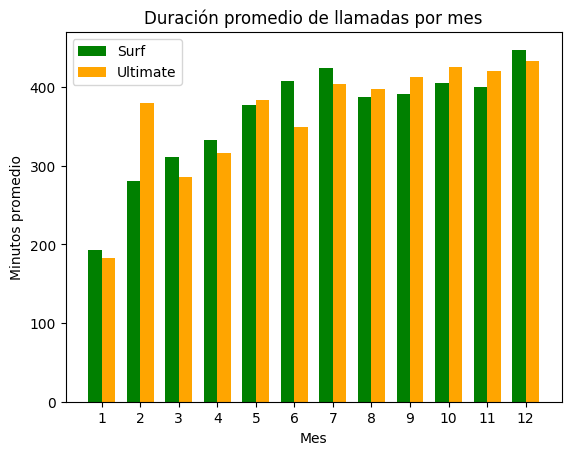

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Calcular el promedio de minutos por plan y mes
avg_minutes_by_plan = user_consume_plans.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

# Separar los datos por plan
surf_data = avg_minutes_by_plan[avg_minutes_by_plan['plan'] == 'surf']
ultimate_data = avg_minutes_by_plan[avg_minutes_by_plan['plan'] == 'ultimate']

# Graficar

x = np.arange(len(surf_data['month'].unique()))
width = 0.35

plt.bar(x - width/2, surf_data['total_minutes'], width, label='Surf', color='green')
plt.bar(x + width/2, ultimate_data['total_minutes'], width, label='Ultimate', color='orange')


plt.xlabel('Mes')
plt.ylabel('Minutos promedio')
plt.title('Duración promedio de llamadas por mes')
plt.xticks(x, surf_data['month'].unique())
plt.legend()
plt.show()



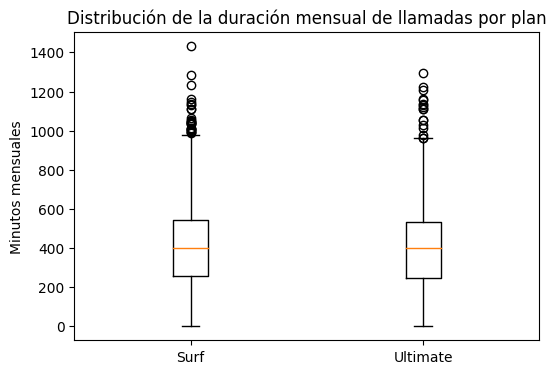

In [ ]:


# Preparar los datos por plan
surf_minutes = user_consume_plans[user_consume_plans['plan'] == 'surf']['total_minutes']
ultimate_minutes = user_consume_plans[user_consume_plans['plan'] == 'ultimate']['total_minutes']


# Crear el diagrama de caja
plt.figure(figsize=(6, 4))
plt.boxplot([surf_minutes, ultimate_minutes], labels=['Surf', 'Ultimate'])
plt.ylabel('Minutos mensuales')
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.show()

In [ ]:
# Comparación de la distribución de la duración mensual de llamadas por cada plan. Traza un diagrama de caja para visualizarla.

# Separar los datos por plan
surf_minutes = user_consume_plans[user_consume_plans['plan'] == 'surf']['total_minutes']
ultimate_minutes = user_consume_plans[user_consume_plans['plan'] == 'ultimate']['total_minutes']

# Calcular estadísticas para el plan Surf
surf_mean = surf_minutes.mean()
surf_std = surf_minutes.std()

# Calcular estadísticas para el plan Ultimate
ultimate_mean = ultimate_minutes.mean()
ultimate_std = ultimate_minutes.std()

print(f"Plan Surf - Media: {surf_mean:.2f} minutos, Desviación estándar: {ultimate_std:.2f}")
print(f"Plan Ultimate - Media: {ultimate_mean:.2f} minutos, Desviación estándar: {ultimate_std:.2f}")

Plan Surf - Media: 404.76 minutos, Desviación estándar: 227.25
Plan Ultimate - Media: 406.19 minutos, Desviación estándar: 227.25


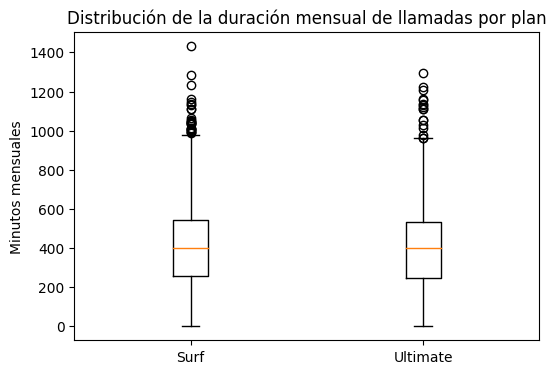

In [ ]:
# Comparación de la distribución de la duración mensual de llamadas por cada plan. 

# Preparar los datos por plan
surf_minutes = user_consume_plans[user_consume_plans['plan'] == 'surf']['total_minutes']
ultimate_minutes = user_consume_plans[user_consume_plans['plan'] == 'ultimate']['total_minutes']

# Crear el diagrama de caja
plt.figure(figsize=(6, 4))
plt.boxplot([surf_minutes, ultimate_minutes], labels=['Surf', 'Ultimate'])
plt.ylabel('Minutos mensuales')
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.show()

### Mensajes

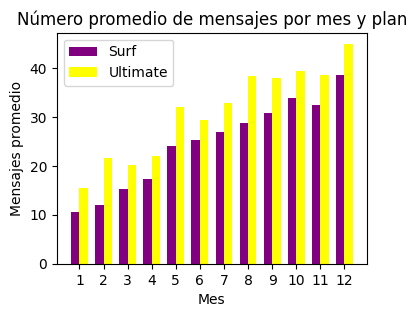

In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

avg_messages_plan_month = user_consume_plans.groupby(['plan', 'month'])['q_messages'].mean().reset_index()

# Separar los datos por plan
surf_messages = avg_messages_plan_month[avg_messages_plan_month['plan'] == 'surf']
ultimate_messages = avg_messages_plan_month[avg_messages_plan_month['plan'] == 'ultimate']

# Crear el gráfico
x = np.arange(len(surf_messages['month'].unique()))
width = 0.35

plt.figure(figsize=(4, 3))
plt.bar(x - width/2, surf_messages['q_messages'], width, label='Surf', color='purple')
plt.bar(x + width/2, ultimate_messages['q_messages'], width, label='Ultimate', color='yellow')
plt.xlabel('Mes')
plt.ylabel('Mensajes promedio')
plt.title('Número promedio de mensajes por mes y plan')
plt.xticks(x, surf_messages['month'].unique())
plt.legend()
plt.show()


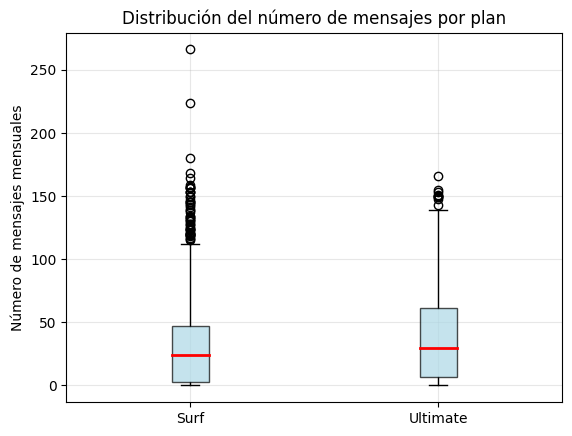

 ESTADÍSTICAS DE MENSAJES POR PLAN 
Plan Surf:
  Media: 31.16 mensajes
  Mediana: 24.00 mensajes
  Desviación estándar: 33.57
  Rango intercuartílico: 44.00

Plan Ultimate:
  Media: 37.55 mensajes
  Mediana: 30.00 mensajes
  Desviación estándar: 34.77
  Rango intercuartílico: 54.00


In [ ]:
# Análisis de distribución de mensajes y estadistica descriptiva

# Separar los datos de mensajes por plan
surf_messages = user_consume_plans[user_consume_plans['plan'] == 'surf']['q_messages']
ultimate_messages = user_consume_plans[user_consume_plans['plan'] == 'ultimate']['q_messages']

# Crear el boxplot
plt.boxplot([surf_messages, ultimate_messages], 
            labels=['Surf', 'Ultimate'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))

plt.ylabel('Número de mensajes mensuales')
plt.title('Distribución del número de mensajes por plan')
plt.grid(True, alpha=0.3)
plt.show()

# Calcular estadísticas descriptivas para mensajes
print(" ESTADÍSTICAS DE MENSAJES POR PLAN ")
print(f"Plan Surf:")
print(f"  Media: {surf_messages.mean():.2f} mensajes")
print(f"  Mediana: {surf_messages.median():.2f} mensajes") 
print(f"  Desviación estándar: {surf_messages.std():.2f}")
print(f"  Rango intercuartílico: {surf_messages.quantile(0.75) - surf_messages.quantile(0.25):.2f}")

print(f"\nPlan Ultimate:")
print(f"  Media: {ultimate_messages.mean():.2f} mensajes")
print(f"  Mediana: {ultimate_messages.median():.2f} mensajes")
print(f"  Desviación estándar: {ultimate_messages.std():.2f}")
print(f"  Rango intercuartílico: {ultimate_messages.quantile(0.75) - ultimate_messages.quantile(0.25):.2f}")

### Internet

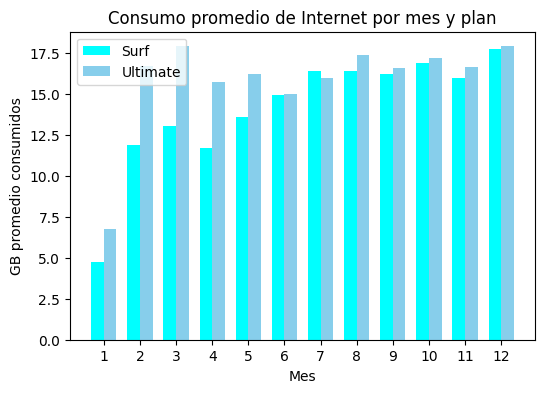

In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
avg_internet_plan_month = user_consume_plans.groupby(['plan', 'month'])['gb_used'].mean().reset_index()


# Separar los datos por plan
surf_internet = avg_internet_plan_month[avg_internet_plan_month['plan'] == 'surf']
ultimate_internet = avg_internet_plan_month[avg_internet_plan_month['plan'] == 'ultimate']

# Crear el gráfico
x = np.arange(len(surf_internet['month'].unique()))
width = 0.35

plt.figure(figsize=(6, 4))
plt.bar(x - width/2, surf_internet['gb_used'], width, label='Surf', color='cyan')
plt.bar(x + width/2, ultimate_internet['gb_used'], width, label='Ultimate', color='skyblue')
plt.xlabel('Mes')
plt.ylabel('GB promedio consumidos')
plt.title('Consumo promedio de Internet por mes y plan')
plt.xticks(x, surf_internet['month'].unique())
plt.legend()
plt.show()



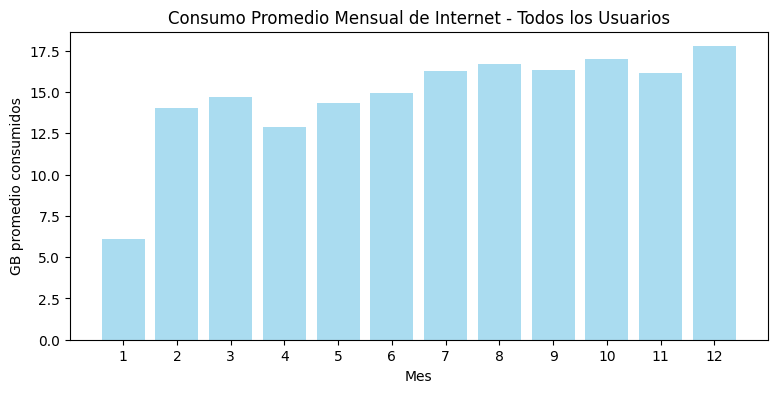

In [ ]:

# Calcular el consumo promedio mensual de internet
consumo_promedio_mensual = user_consume_plans.groupby('month')['gb_used'].mean().reset_index()
plt.figure(figsize=(9, 4))

bars = plt.bar(consumo_promedio_mensual['month'], consumo_promedio_mensual['gb_used'], 
               color='skyblue', alpha=0.7)

plt.xlabel('Mes')
plt.ylabel('GB promedio consumidos')
plt.title('Consumo Promedio Mensual de Internet - Todos los Usuarios')
plt.xticks(consumo_promedio_mensual['month'])

plt.show()


 EXCESOS de navecación POR PLAN Y MES 
        plan  month  usuarios_con_exceso
0       surf      2                    4
1       surf      3                   11
2       surf      4                   17
3       surf      5                   30
4       surf      6                   50
5       surf      7                   73
6       surf      8                   92
7       surf      9                  115
8       surf     10                  147
9       surf     11                  156
10      surf     12                  216
11  ultimate      3                    3
12  ultimate      4                    2
13  ultimate      5                    1
14  ultimate      6                    2
15  ultimate      7                    2
16  ultimate      8                    4
17  ultimate      9                    5
18  ultimate     10                    6
19  ultimate     11                    5
20  ultimate     12                   11


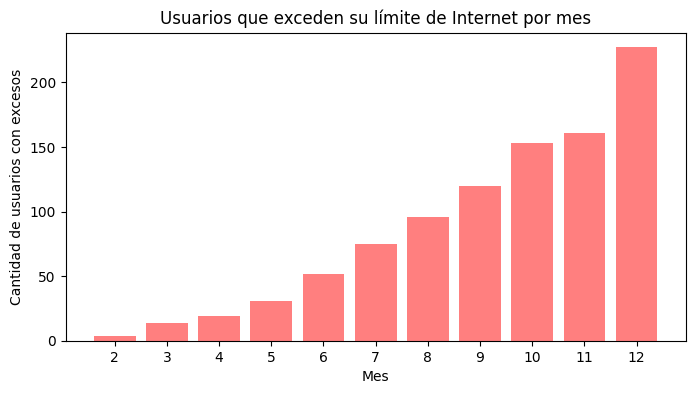

In [ ]:

# Análisis de excesos por plan y mes

# Usuarios con EXCESO (valores positivos) por mes

# (usuarios con dif_internet > 0, es decir, valores POSITIVOS)
excesos_por_plan_mes = (
    user_consume_plans[user_consume_plans['dif_internet'] > 0]
    .groupby(['plan', 'month'])
    .size()
    .reset_index(name='usuarios_con_exceso')
)

print(" EXCESOS de navecación POR PLAN Y MES ")
print(excesos_por_plan_mes)

# SEGUNDO: Ahora sí puedes usar la variable que ya definiste
# Usuarios con EXCESO (valores positivos) por mes
excesos_por_mes = excesos_por_plan_mes.groupby('month')['usuarios_con_exceso'].sum().reset_index()

plt.figure(figsize=(8, 4))
bars = plt.bar(excesos_por_mes['month'], excesos_por_mes['usuarios_con_exceso'], color='red', alpha=0.5)
plt.xlabel('Mes')
plt.ylabel('Cantidad de usuarios con excesos')
plt.title('Usuarios que exceden su límite de Internet por mes')
plt.xticks(excesos_por_mes['month'])

plt.show()



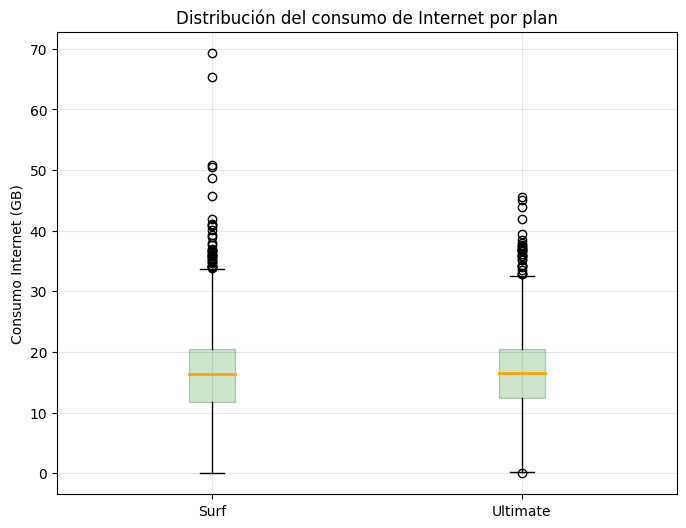

ESTADÍSTICAS DE CONSUMO DE INTERNET POR PLAN
Plan Surf:
  Media: 16.17 GB
  Mediana: 16.43 GB
  Desviación estándar: 7.83

Plan Ultimate:
  Media: 16.81 GB
  Mediana: 16.46 GB
  Desviación estándar: 7.67


In [ ]:

# Análisis de distribución del consumo de internet con boxplot por plan
plt.figure(figsize=(8, 6))

# Separar los datos de consumo de internet por plan (datos individuales de usuarios)
# Convertir MB a GB para mejor legibilidad
surf_internet_gb = user_consume_plans[user_consume_plans['plan'] == 'surf']['gb_used']
ultimate_internet_gb = user_consume_plans[user_consume_plans['plan'] == 'ultimate']['gb_used']

# Crear el boxplot
plt.boxplot([surf_internet_gb, ultimate_internet_gb], 
            labels=['Surf', 'Ultimate'],
            patch_artist=True,
            boxprops=dict(facecolor='green', alpha=0.2),
            medianprops=dict(color='orange', linewidth=2))

plt.ylabel('Consumo Internet (GB)')
plt.title('Distribución del consumo de Internet por plan')
plt.grid(True, alpha=0.3)
plt.show()

# Calcular estadísticas descriptivas para internet en GB
print("ESTADÍSTICAS DE CONSUMO DE INTERNET POR PLAN")
print(f"Plan Surf:")
print(f"  Media: {surf_internet_gb.mean():.2f} GB")
print(f"  Mediana: {surf_internet_gb.median():.2f} GB") 
print(f"  Desviación estándar: {surf_internet_gb.std():.2f}")

print(f"\nPlan Ultimate:")
print(f"  Media: {ultimate_internet_gb.mean():.2f} GB")
print(f"  Mediana: {ultimate_internet_gb.median():.2f} GB")
print(f"  Desviación estándar: {ultimate_internet_gb.std():.2f}")

## Ingreso

In [ ]:
#Calcular los ingresos mensuales


print(user_consume_plans.columns.tolist())

# Calcular costos adicionales por excesos (solo valores positivos)
user_consume_plans['costo_exceso_calls'] = np.where(
    user_consume_plans['dif_calls'] > 0,
    user_consume_plans['dif_calls'] * user_consume_plans['usd_per_minute'],
    0
)

user_consume_plans['costo_exceso_messages'] = np.where(
    user_consume_plans['dif_messages'] > 0,
    user_consume_plans['dif_messages'] * user_consume_plans['usd_per_message'],
    0
)

# Para internet, convertir MB a GB dividiendo entre 1024
user_consume_plans['costo_exceso_internet'] = np.where(
    user_consume_plans['dif_internet'] > 0,
    user_consume_plans['dif_internet'] * user_consume_plans['usd_per_gb'],
    0
)
print()
print("Verificar si se anhadieron nuevas columnas con los costos de excesos")
print()
print(user_consume_plans.columns.tolist())



['user_id', 'month', 'q_calls', 'total_minutes', 'q_messages', 'mb_used', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date', 'age_group', 'state', 'reg_month', 'reg_quarter', 'days_active', 'churned', 'customer_lifetime_days', 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'gb_per_month_included', 'gb_used', 'gb_used_rounded', 'dif_calls', 'dif_messages', 'dif_internet', 'excess_minutes', 'excess_messages', 'excess_mb']

Verificar si se anhadieron nuevas columnas con los costos de excesos

['user_id', 'month', 'q_calls', 'total_minutes', 'q_messages', 'mb_used', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date', 'age_group', 'state', 'reg_month', 'reg_quarter', 'days_active', 'churned', 'customer_lifetime_days', 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'gb

In [ ]:
# Calcular el ingreso total por usuario y mes
user_consume_plans['ingreso_total'] = (
    user_consume_plans['usd_monthly_pay'] + 
    user_consume_plans['costo_exceso_calls'] + 
    user_consume_plans['costo_exceso_messages'] + 
    user_consume_plans['costo_exceso_internet']
)

user_consume_plans.head()

,user_id,month,q_calls,total_minutes,q_messages,mb_used,first_name,last_name,age,city,...,dif_calls,dif_messages,dif_internet,excess_minutes,excess_messages,excess_mb,costo_exceso_calls,costo_exceso_messages,costo_exceso_internet,ingreso_total
0,1000,12,16.0,116.83,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,-2883.17,-989.0,-28.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
1,1001,8,27.0,171.14,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,-328.86,-20.0,-8.0,0.0,0.0,0.0,0.0,0.00,0.0,20.00
2,1001,9,49.0,297.69,44.0,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,-202.31,-6.0,-1.0,0.0,0.0,0.0,0.0,0.00,0.0,20.00
3,1001,10,65.0,374.11,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,-125.89,3.0,7.0,0.0,3.0,7.0,0.0,0.09,70.0,90.09
4,1001,11,64.0,404.59,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,-95.41,-14.0,4.0,0.0,0.0,4.0,0.0,0.00,40.0,60.00


In [ ]:
# Agrupar ingresos por mes y plan

ingresos_por_mes = user_consume_plans.groupby(['month', 'plan'])['ingreso_total'].sum().reset_index()
print(" INGRESOS TOTALES POR MES Y PLAN ")
print(ingresos_por_mes)

 INGRESOS TOTALES POR MES Y PLAN 
    month      plan  ingreso_total
0       1      surf        40.0000
1       1  ultimate       280.0000
2       2      surf       308.3106
3       2  ultimate       490.0000
4       3      surf      1053.1760
5       3  ultimate       896.0000
6       4      surf      2022.7350
7       4  ultimate      1533.0000
8       5      surf      3637.1069
9       5  ultimate      2051.0000
10      6      surf      4746.2813
11      6  ultimate      3367.0000
12      7      surf      7528.8550
13      7  ultimate      4242.0000
14      8      surf     10298.7550
15      8  ultimate      5173.0000
16      9      surf     11242.0168
17      9  ultimate      6195.0000
18     10      surf     15416.0702
19     10  ultimate      7665.0000
20     11      surf     16308.9542
21     11  ultimate      9107.0000
22     12      surf     22292.6546
23     12  ultimate     11067.0000


plan
surf        60.327346
ultimate    72.313889
Name: ingreso_total, dtype: float64


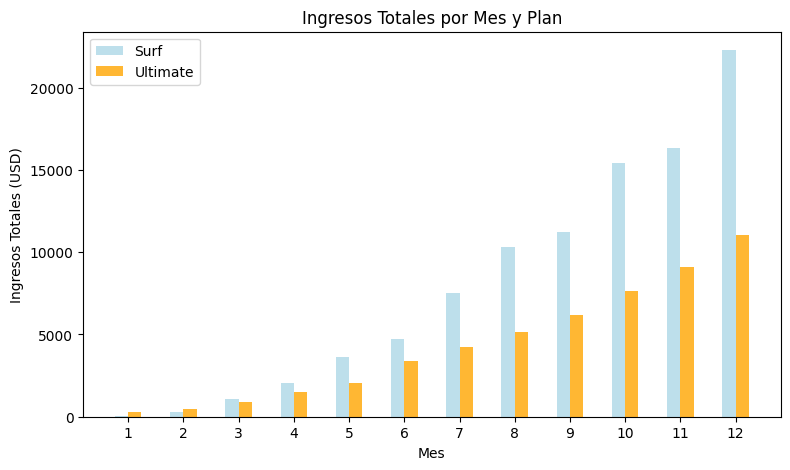

In [ ]:
#Crear el grafico de barras 
surf_data = ingresos_por_mes[ingresos_por_mes['plan'] == 'surf']
ultimate_data = ingresos_por_mes[ingresos_por_mes['plan'] == 'ultimate']

# Ingreso promedio por usuario por plan
ingreso_promedio = user_consume_plans.groupby('plan')['ingreso_total'].mean()
print(ingreso_promedio)

#Gráficos 

x = np.arange(len(surf_data['month']))  # posiciones de los meses
width = 0.24  # ancho de las barras

fig, ax = plt.subplots(figsize=(9, 5))

# Crear las barras
bars1 = ax.bar(x - width/2, surf_data['ingreso_total'], width, 
               label='Surf', color='lightblue', alpha=0.8)
bars2 = ax.bar(x + width/2, ultimate_data['ingreso_total'], width,
               label='Ultimate', color='orange', alpha=0.8)

# Personalizar el gráfico
ax.set_xlabel('Mes')
ax.set_ylabel('Ingresos Totales (USD)')
ax.set_title('Ingresos Totales por Mes y Plan')
ax.set_xticks(x)
ax.set_xticklabels(surf_data['month'])
ax.legend()
plt.show()

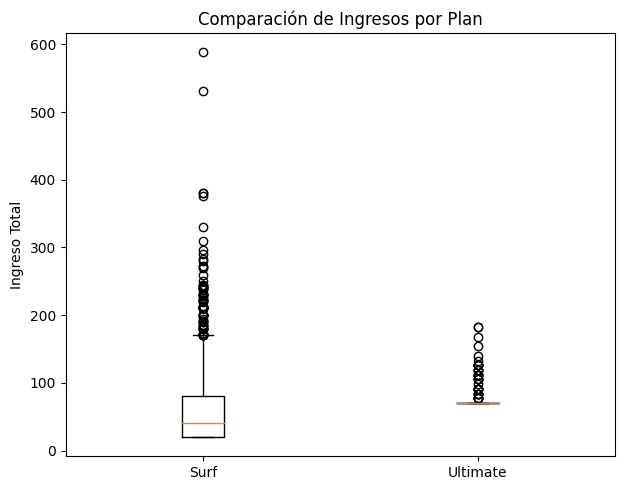

In [ ]:
# Prueba las hipótesis

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 2)
plt.boxplot([surf_incomes, ultimate_incomes], labels=['Surf', 'Ultimate'])
plt.ylabel('Ingreso Total')
plt.title('Comparación de Ingresos por Plan')

plt.tight_layout()
plt.show()



## Prueba las hipótesis estadísticas

In [ ]:
# Prueba las hipótesis


# Formulación de las hipótesis
print("H₀: μ_surf = μ_ultimate")
print("H₁: μ_surf ≠ μ_ultimate")

alpha = 0.05 

# Separar los ingresos por plan
surf_incomes = user_consume_plans[user_consume_plans['plan'] == 'surf']['ingreso_total']
ultimate_incomes = user_consume_plans[user_consume_plans['plan'] == 'ultimate']['ingreso_total']

# Tstudent
statistic, p_value = st.ttest_ind(surf_incomes, ultimate_incomes)

print(f"Estadístico t: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Nivel de significancia (alpha): {alpha}")

# Interpretación del resultado
if p_value < alpha:
    print(f"\nRechazamos H₀ (p-value = {p_value:.4f} < {alpha})")
    print("Los ingresos promedio entre los planes Surf y Ultimate, son significativamente diferentes.")
else:
    print(f"\nConclusión: No rechazamos H₀ (p-value = {p_value:.4f} >= {alpha})")
    print("No hay evidencia suficiente para afirmar que los ingresos promedio son diferentes.")


H₀: μ_surf = μ_ultimate
H₁: μ_surf ≠ μ_ultimate
Estadístico t: -5.7636
P-value: 0.0000
Nivel de significancia (alpha): 0.05

Rechazamos H₀ (p-value = 0.0000 < 0.05)
Los ingresos promedio entre los planes Surf y Ultimate, son significativamente diferentes.


In [ ]:
# Ver todas las ciudades únicas
print("Ciudades disponibles:")
print(user_consume_plans['city'].unique())

print()

# Buscar ciudades que contengan NY o NJ (filtrar)
ny_nj_cities = user_consume_plans['city'].str.contains('NY|NJ', na=False)
ciudades_ny_nj = user_consume_plans[ny_nj_cities]['city'].unique()
print("Ciudades de NY-NJ:")
print(ciudades_ny_nj)

print()

# Crear las variables que necesitas para el test

ny_nj_incomes = user_consume_plans[user_consume_plans['city'].str.contains('NY|NJ', na=False)]['ingreso_total']
other_incomes = user_consume_plans[~user_consume_plans['city'].str.contains('NY|NJ', na=False)]['ingreso_total']


print(f"Usuarios NY-NJ: {len(ny_nj_incomes)}")
print(f"Usuarios otras regiones: {len(other_incomes)}")


Ciudades disponibles:
['Atlanta-Sandy Springs-Roswell, GA MSA' 'Seattle-Tacoma-Bellevue, WA MSA'
 'Las Vegas-Henderson-Paradise, NV MSA' 'Tulsa, OK MSA'
 'Dallas-Fort Worth-Arlington, TX MSA'
 'San Francisco-Oakland-Berkeley, CA MSA' 'Grand Rapids-Kentwood, MI MSA'
 'Orlando-Kissimmee-Sanford, FL MSA'
 'San Jose-Sunnyvale-Santa Clara, CA MSA' 'Cleveland-Elyria, OH MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA' 'Knoxville, TN MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Pittsburgh, PA MSA'
 'Fresno, CA MSA' 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Jacksonville, FL MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'Omaha-Council Bluffs, NE-IA MSA'
 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Tampa-St. Petersburg-Clearwater, FL MSA' 'Birmingham-Hoover, AL MSA'
 'Oklahoma City, OK MSA' 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Denver-Aurora-Lakewood, CO MSA'
 'Nashville-Davidson–Murfr

In [ ]:

# Test t de Student para muestras independientes
statistic, p_value = st.ttest_ind(ny_nj_incomes, other_incomes)

alpha = 0.05
print(f"Estadístico t: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Rechazamos H₀: Hay diferencia significativa entre regiones")
else:
    print("No rechazamos H₀: No hay diferencia significativa")


Estadístico t: -1.6093
P-value: 0.1077
No rechazamos H₀: No hay diferencia significativa


## Conclusión general



Comportamiento de Surf y Ultimate pareciera ser similar en terminos de consumo,
sin embargo llama la atención como varía con los meses y particularmente a fin de año sube el consumo en todo.
El plan surf genera ingresos mayores y mas variables, pero puede ser atractivo para adquirir nuevos clientes al inicio.
Los usuarios Surf exceden más frecuentemente y pagan $10/GB extra
En promedio los usuarios ultimated generan mayores ingresos por el precio del plan 

Patrones similares con diferencias clave:
- Los usuarios de ambos planes muestran comportamientos de consumo similares en llamadas y mensajes, con medias prácticamente idénticas (Surf: 436.52 min vs Ultimate: 434.68 min)
- Los usuarios Ultimate consumen consistentemente más datos, pero rara vez exceden sus límites (30GB) comparado con Surf (15GB)
Crecimiento progresivo hacia fin de año
- Patrón estacional: El consumo aumenta significativamente en el último trimestre, especialmente en diciembre
' Excesos crecientes: Los usuarios Surf muestran un incremento de excesos (de 4 usuarios en febrero a 212 en diciembre)


Ingresos totales:
- Surf genera más ingresos totales debido a su mayor base de usuarios (339 vs 161)
- Ultimate es mas rentable por usuario individual
- Surf es el que genera mayores ingresos para la empresa, por que tiene la mayor canidad de usuarios, y la generación constante de ingresos por excesos


P-value << 0.05: Diferencia estadísticamente significativa entre los ingresos promedio de ambos planes
Confianza alta: Los datos proporcionan evidencia sólida para la toma de decisiones.


